<a href="https://colab.research.google.com/github/Tessellate-Imaging/monk_v1/blob/master/study_roadmaps/4_image_classification_zoo/Classifying%20groceries%20using%20Monk%20in%205%20steps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Table of Contents


## [0. Install](#0)


## [1. Importing mxnet-gluoncv backend](#1)


## [2. Creating and Managing experiments](#2)


## [3. Set dataset and select the model](#3)


## [4. See what other models Monk's mxnet backend supports](#4)


## [5. Train the classifier](#5)


## [6. Running inference on test images](#6)

<a id='0'></a>
# Install Monk
  
 - git clone https://github.com/Tessellate-Imaging/monk_v1.git
 
 - cd monk_v1/installation/Linux && pip install -r requirements_cu9.txt
     - (Select the requirements file as per OS and CUDA version)

In [1]:
!git clone https://github.com/Tessellate-Imaging/monk_v1.git

Cloning into 'monk_v1'...
remote: Enumerating objects: 49, done.
remote: Counting objects: 100% (49/49), done.
remote: Compressing objects: 100% (36/36), done.
remote: Total 1954 (delta 20), reused 29 (delta 12), pack-reused 1905
Receiving objects: 100% (1954/1954), 70.90 MiB | 15.48 MiB/s, done.
Resolving deltas: 100% (1040/1040), done.


In [ ]:
# If using Colab install using the commands below
!cd monk_v1/installation/Misc && pip install -r requirements_colab.txt

# If using Kaggle uncomment the following command
#!cd monk_v1/installation/Misc && pip install -r requirements_kaggle.txt

# Select the requirements file as per OS and CUDA version when using a local system or cloud
#!cd monk_v1/installation/Linux && pip install -r requirements_cu9.txt

## Dataset
    - Freiburg Grocerices Dataset - https://github.com/PhilJd/freiburg_groceries_dataset.git

## Download the dataset

In [2]:
! git clone https://github.com/PhilJd/freiburg_groceries_dataset.git

Cloning into 'freiburg_groceries_dataset'...
remote: Enumerating objects: 123, done.
remote: Total 123 (delta 0), reused 0 (delta 0), pack-reused 123
Receiving objects: 100% (123/123), 6.54 MiB | 2.21 MiB/s, done.
Resolving deltas: 100% (57/57), done.


In [3]:
! cd freiburg_groceries_dataset/src && python download_dataset.py

Extracting dataset.
Done.


<a id='1'></a>
# Imports

In [4]:
# Monk
import os
import sys
sys.path.append("monk_v1/monk/");

In [5]:
#Using mxnet-gluon backend 
from gluon_prototype import prototype

# For pytorch backend - from pytorch_prototype import prototype
# For keras backend - from keras_prototype import prototype

<a id='2'></a>
# Creating and managing experiments
    - Provide project name
    - Provide experiment name
    - For a specific data create a single project
    - Inside each project multiple experiments can be created
    - Every experiment can be have diferent hyper-parameters attached to it

In [7]:
gtf = prototype(verbose=1);
gtf.Prototype("Groceries_Dataset", "Experiment-1");

Mxnet Version: 1.5.0

Experiment Details
    Project: Groceries_Dataset
    Experiment: Experiment-1
    Dir: /home/abhi/Downloads/tmp_groceries/freiburg_groceries_dataset/workspace/Groceries_Dataset/Experiment-1/



### This creates files and directories as per the following structure
    
    
    workspace
        |
        |--------Grooceries_Dataset
                        |
                        |
                        |-----Experiment-1 
                                    |
                                    |-----experiment-state.json
                                    |
                                    |-----output
                                            |
                                            |------logs (All training logs and graphs saved here)
                                            |
                                            |------models (all trained models saved here)
                                    

<a id='2'></a>
# Set dataset and select the model

## Quick mode training

    - Using Default Function
        - dataset_path
        - model_name
        - num_epochs
        
        
## Dataset folder structure

    parent_directory
        |
        |
        |------class1
                |
                |------img1.jpg
                |------img2.jpg
                |------.... (and so on)
        |------class2
                |
                |------img1.jpg
                |------img2.jpg
                |------.... (and so on)  
        |------...(and so on)

## Modifyable params 
    - dataset_path: path to data
    - model_name: which pretrained model to use
    - freeze_base_network: Retrain already trained network or not
    - num_epochs: Number of epochs to train for

In [9]:
gtf.Default(dataset_path="freiburg_groceries_dataset/images", 
            model_name="densenet121", 
            freeze_base_network=False,
            num_epochs=20);

#Read the summary generated once you run this cell. 

Dataset Details
    Train path:     freiburg_groceries_dataset/images
    Val path:       None
    CSV train path: None
    CSV val path:   None

Dataset Params
    Input Size:   224
    Batch Size:   4
    Data Shuffle: True
    Processors:   4
    Train-val split:   0.7

Pre-Composed Train Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Pre-Composed Val Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Dataset Numbers
    Num train images: 3462
    Num val images:   1485
    Num classes:      25

Model Params
    Model name:           densenet121
    Use Gpu:              True
    Use pretrained:       True
    Freeze base network:  False

Model Details
    Loading pretrained model
    Model Loaded on device
        Model name:                           densenet121
        Num of potentially trainable layers:  363
        Num 

monk_v1/monk/system/imports.py:193: UserWarning: ArgumentWarning: clipnorm and clipvalue are active only for keras in current version of Monk
  warnings.warn(msg)
monk_v1/monk/system/imports.py:193: UserWarning: ArgumentWarning: momentum_dampening_rate is active only for pytorch in current version of Monk
  warnings.warn(msg)


## From the summary above

    - Model Params
        Model name:           densenet121
        Use Gpu:              True
        Use pretrained:       True
        Freeze base network:  False

## EDA on Dataset

In [11]:
gtf.EDA(save_img=True);

EDA: Class imbalance
    1. Class: CHIPS, Number: 181
    2. Class: OIL, Number: 143
    3. Class: HONEY, Number: 185
    4. Class: TEA, Number: 283
    5. Class: NUTS, Number: 168
    6. Class: SODA, Number: 177
    7. Class: JUICE, Number: 302
    8. Class: PASTA, Number: 172
    9. Class: RICE, Number: 150
    10. Class: SUGAR, Number: 118
    11. Class: BEANS, Number: 136
    12. Class: FISH, Number: 110
    13. Class: COFFEE, Number: 298
    14. Class: MILK, Number: 162
    15. Class: JAM, Number: 241
    16. Class: WATER, Number: 262
    17. Class: FLOUR, Number: 109
    18. Class: SPICES, Number: 207
    19. Class: CANDY, Number: 372
    20. Class: TOMATO_SAUCE, Number: 171
    21. Class: CHOCOLATE, Number: 307
    22. Class: CORN, Number: 97
    23. Class: VINEGAR, Number: 157
    24. Class: CAKE, Number: 161
    25. Class: CEREAL, Number: 278



<Figure size 432x288 with 0 Axes>

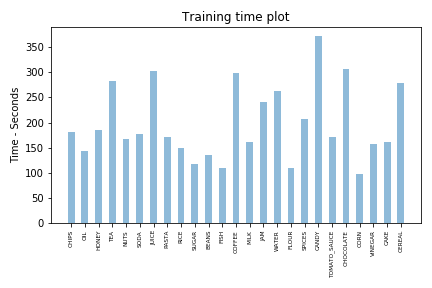

In [12]:
from IPython.display import Image
Image(filename='workspace/Groceries_Dataset/Experiment-1/output/logs/classes_per_image.png')

<a id='4'></a>
# See what other models Monk's mxnet backend supports

In [13]:
gtf.List_Models();

Models List: 
    1. alexnet
    2. darknet53
    3. densenet121
    4. densenet161
    5. densenet169
    6. densenet201
    7. inceptionv3
    8. mobilenet1.0
    9. mobilenet0.75
    10. mobilenet0.25
    11. mobilenet0.5
    12. resnet18_v1
    13. resnet34_v1
    14. resnet50_v1
    15. resnet101_v1
    16. resnet152_v1
    17. resnext50_32x4d
    18. resnext101_32x4d
    19. resnext101_64x4d_v1
    20. se_resnext50_32x4d
    21. se_resnext101_32x4d
    22. se_resnext101_64x4d
    23. senet_154
    24. vgg11
    25. vgg13
    26. vgg16
    27. vgg19
    28. vgg11_bn
    29. vgg13_bn
    30. vgg16_bn
    31. vgg19_bn
    32. resnet18_v2
    33. resnet34_v2
    34. resnet50_v2
    35. resnet101_v2
    36. resnet152_v2
    37. mobilenetv2_1.0
    38. mobilenetv2_0.75
    39. mobilenetv2_0.5
    40. mobilenetv2_0.25
    41. squeezenet1.0
    42. squeezenet1.1
    43. mobilenetv3_large
    44. mobilenetv3_small
    45. resnet18_v1b
    46. resnet34_v1b
    47. resnet50_v1b
    48. resn

<a id='5'></a>
# Train the classifier

In [14]:
#Start Training
gtf.Train();

#Read the training summary generated once you run the cell and training is completed

Training Start
    Epoch 1/20
    ----------




    curr_lr - 0.01
    [Epoch 1] Train-acc: 0.401, Train-loss: 2.059 | Val-acc: 0.532660, Val-loss: 1.567, | time: 66.1 sec

    Epoch 2/20
    ----------




    curr_lr - 0.01
    [Epoch 2] Train-acc: 0.650, Train-loss: 1.176 | Val-acc: 0.633670, Val-loss: 1.280, | time: 64.0 sec

    Epoch 3/20
    ----------




    curr_lr - 0.01
    [Epoch 3] Train-acc: 0.752, Train-loss: 0.817 | Val-acc: 0.677441, Val-loss: 1.092, | time: 63.9 sec

    Epoch 4/20
    ----------




    curr_lr - 0.01
    [Epoch 4] Train-acc: 0.823, Train-loss: 0.578 | Val-acc: 0.686195, Val-loss: 1.116, | time: 64.2 sec

    Epoch 5/20
    ----------




    curr_lr - 0.01
    [Epoch 5] Train-acc: 0.858, Train-loss: 0.495 | Val-acc: 0.748822, Val-loss: 0.908, | time: 63.5 sec

    Epoch 6/20
    ----------




    curr_lr - 0.01
    [Epoch 6] Train-acc: 0.894, Train-loss: 0.347 | Val-acc: 0.743434, Val-loss: 0.923, | time: 63.8 sec

    Epoch 7/20
    ----------




    curr_lr - 0.01
    [Epoch 7] Train-acc: 0.917, Train-loss: 0.282 | Val-acc: 0.748148, Val-loss: 0.964, | time: 64.0 sec

    Epoch 8/20
    ----------




    curr_lr - 0.01
    [Epoch 8] Train-acc: 0.932, Train-loss: 0.224 | Val-acc: 0.778451, Val-loss: 0.854, | time: 63.7 sec

    Epoch 9/20
    ----------




    curr_lr - 0.01
    [Epoch 9] Train-acc: 0.938, Train-loss: 0.209 | Val-acc: 0.787205, Val-loss: 0.781, | time: 63.7 sec

    Epoch 10/20
    ----------




    curr_lr - 0.01
    [Epoch 10] Train-acc: 0.947, Train-loss: 0.186 | Val-acc: 0.780471, Val-loss: 0.764, | time: 63.6 sec

    Epoch 11/20
    ----------




    curr_lr - 0.001
    [Epoch 11] Train-acc: 0.972, Train-loss: 0.111 | Val-acc: 0.812121, Val-loss: 0.703, | time: 64.6 sec

    Epoch 12/20
    ----------




    curr_lr - 0.001
    [Epoch 12] Train-acc: 0.980, Train-loss: 0.080 | Val-acc: 0.820202, Val-loss: 0.637, | time: 63.9 sec

    Epoch 13/20
    ----------




    curr_lr - 0.001
    [Epoch 13] Train-acc: 0.983, Train-loss: 0.069 | Val-acc: 0.830976, Val-loss: 0.633, | time: 63.9 sec

    Epoch 14/20
    ----------




    curr_lr - 0.001
    [Epoch 14] Train-acc: 0.983, Train-loss: 0.071 | Val-acc: 0.841751, Val-loss: 0.559, | time: 63.7 sec

    Epoch 15/20
    ----------




    curr_lr - 0.001
    [Epoch 15] Train-acc: 0.985, Train-loss: 0.060 | Val-acc: 0.836364, Val-loss: 0.582, | time: 64.0 sec

    Epoch 16/20
    ----------




    curr_lr - 0.0001
    [Epoch 16] Train-acc: 0.985, Train-loss: 0.051 | Val-acc: 0.839057, Val-loss: 0.575, | time: 63.7 sec

    Epoch 17/20
    ----------




    curr_lr - 0.0001
    [Epoch 17] Train-acc: 0.985, Train-loss: 0.057 | Val-acc: 0.833670, Val-loss: 0.587, | time: 64.0 sec

    Epoch 18/20
    ----------




    curr_lr - 0.0001
    [Epoch 18] Train-acc: 0.989, Train-loss: 0.049 | Val-acc: 0.849158, Val-loss: 0.553, | time: 66.2 sec

    Epoch 19/20
    ----------




    curr_lr - 0.0001
    [Epoch 19] Train-acc: 0.983, Train-loss: 0.062 | Val-acc: 0.846465, Val-loss: 0.592, | time: 64.7 sec

    Epoch 20/20
    ----------




    curr_lr - 0.0001
    [Epoch 20] Train-acc: 0.988, Train-loss: 0.055 | Val-acc: 0.836364, Val-loss: 0.603, | time: 64.2 sec

    Training completed in: 21m 16s
    Best val Acc:          0.849158

Training End

Training Outputs
    Model Dir:   /home/abhi/Downloads/tmp_groceries/freiburg_groceries_dataset/workspace/Groceries_Dataset/Experiment-1/output/models/
    Log Dir:     /home/abhi/Downloads/tmp_groceries/freiburg_groceries_dataset/workspace/Groceries_Dataset/Experiment-1/output/logs/
    Final model: final
    Best model:  best_model
    Log 1 - Validation accuracy history log: val_acc_history.npy
    Log 2 - Validation loss history log:     val_loss_history.npy
    Log 3 - Training accuracy history log:   train_acc_history.npy
    Log 4 - Training loss history log:       train_loss_history.npy
    Log 5 - Training curve:                  train_loss_history.npy
    Log 6 - Validation curve:                train_loss_history.npy



<Figure size 432x288 with 0 Axes>

<a id='7'></a>
# Running inference on test images

## Load the experiment in inference mode
    - Set flag eval_infer as True

In [15]:
gtf = prototype(verbose=1);
gtf.Prototype("Groceries_Dataset", "Experiment-1", eval_infer=True);

Mxnet Version: 1.5.0

Model Details
    Loading model - workspace/Groceries_Dataset/Experiment-1/output/models/final-symbol.json
    Model loaded!

Experiment Details
    Project: Groceries_Dataset
    Experiment: Experiment-1
    Dir: /home/abhi/Downloads/tmp_groceries/freiburg_groceries_dataset/workspace/Groceries_Dataset/Experiment-1/



## Select image and Run inference

Prediction
    Image name:         test/BEANS0001.png
    Predicted class:      BEANS
    Predicted score:      14.956836700439453



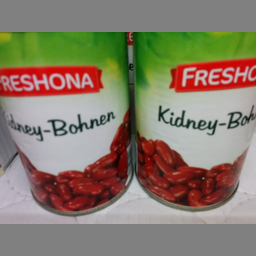

In [16]:
img_name = "test_groceries/BEANS0001.png";
predictions = gtf.Infer(img_name=img_name);

#Display 
from IPython.display import Image
Image(filename=img_name) 

Prediction
    Image name:         test/CAKE0000.png
    Predicted class:      CAKE
    Predicted score:      14.991244316101074



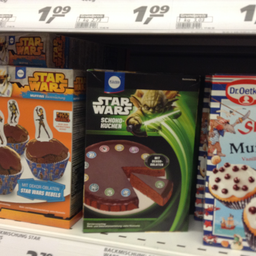

In [17]:
img_name = "test_groceries/CAKE0000.png";
predictions = gtf.Infer(img_name=img_name);

#Display 
from IPython.display import Image
Image(filename=img_name) 